# Model for color detection

## Import libraries

In [ ]:
import numpy as np
import pandas as pd
import math
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, ConfusionMatrixDisplay, recall_score, classification_report

from google.colab import drive
drive.mount('/content/drive')

seed = 157 # fix randomisation
np.random.seed(seed)
tf.random.set_seed(seed)

Mounted at /content/drive


In [ ]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from scikeras.wrappers import KerasClassifier

## Import dataset

In [ ]:
color_set = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UCL/Assessment/color_dataset.csv')

## Data analysis


In [ ]:
color_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5052 entries, 0 to 5051
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   red     5052 non-null   int64 
 1   green   5052 non-null   int64 
 2   blue    5052 non-null   int64 
 3   label   5052 non-null   object
dtypes: int64(3), object(1)
memory usage: 158.0+ KB


In [ ]:
color_set.head()

,red,green,blue,label
0,20,139,240,Blue
1,174,83,72,Brown
2,144,249,131,Green
3,168,25,156,Pink
4,30,182,136,Green


In [ ]:
color_set.columns

Index(['red', 'green', 'blue', 'label'], dtype='object')

In [ ]:
nb_col=len(color_set.columns)

## Data Preprocessing


### Data Encoding
Converting the label into binary variables using One-Hot Encoding as there is no order in the label

In [ ]:
df_colors = pd.get_dummies(color_set, columns=['label'])
df_colors.head()

,red,green,blue,label_Black,label_Blue,label_Brown,label_Green,label_Grey,label_Orange,label_Pink,label_Purple,label_Red,label_White,label_Yellow
0,20,139,240,0,1,0,0,0,0,0,0,0,0,0
1,174,83,72,0,0,1,0,0,0,0,0,0,0,0
2,144,249,131,0,0,0,1,0,0,0,0,0,0,0
3,168,25,156,0,0,0,0,0,0,1,0,0,0,0
4,30,182,136,0,0,0,1,0,0,0,0,0,0,0


### Data Normalization
Transform the RGB value from 0 to 255 to values from 0 to 1

In [ ]:
df_colors['red'] = df_colors['red'] / 255.0
df_colors['green'] = df_colors['green'] / 255.0
df_colors['blue'] = df_colors['blue'] / 255.0

In [ ]:
df_colors.head()

,red,green,blue,label_Black,label_Blue,label_Brown,label_Green,label_Grey,label_Orange,label_Pink,label_Purple,label_Red,label_White,label_Yellow
0,0.078431,0.545098,0.941176,0,1,0,0,0,0,0,0,0,0,0
1,0.682353,0.325490,0.282353,0,0,1,0,0,0,0,0,0,0,0
2,0.564706,0.976471,0.513725,0,0,0,1,0,0,0,0,0,0,0
3,0.658824,0.098039,0.611765,0,0,0,0,0,0,1,0,0,0,0
4,0.117647,0.713725,0.533333,0,0,0,1,0,0,0,0,0,0,0


### Split the dataset (70/15/15)

Splitting the dataset into 2 sets:
  - 70% for the training set (used to get the parameters of the model)
  - 15% for validation set (used to define the hyperparameter and avoid overfitting)
  - 15% for test set (used to test the model on unseen data)

In [ ]:
# sample the dataset
df = shuffle(df_colors)

# split between xs an ys
xs, ys = np.split(df.values, [3], axis=1)
#ys = ys.reshape(-1)

In [ ]:
xs_train, xs_test, ys_train, ys_test = train_test_split(xs, ys, test_size = 0.2, random_state = seed)

## Modelling

### ANN

#### Model 1

Define and compile the model

In [ ]:
# Parameters model 1
nb_layers1 = 2
activation_fct = 'relu'
loss_function = 'mean_squared_error'
optimizer = 'adam'
xs_shape = len(pd.DataFrame(xs_train).keys())

# model 1
model1 = keras.Sequential([
    layers.Dense(3, input_shape=[xs_shape], activation=activation_fct),
    layers.Dense(16, activation = activation_fct),
    layers.Dense(11)
])
model1.summary()

# compile the model 1
model1.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 16)                64        
                                                                 
 dense_2 (Dense)             (None, 11)                187       
                                                                 
Total params: 263
Trainable params: 263
Non-trainable params: 0
_________________________________________________________________


Train the model 1

In [ ]:
# fit the model with the Train set
training_history1 = model1.fit(x=xs_train, y=ys_train, 
                               validation_split=0.15, epochs=200,
                               batch_size=100)

# best accuracy 0.4671

Epoch 1/200
35/35 [==============================] - 3s 21ms/step - loss: 0.0920 - accuracy: 0.0579 - val_loss: 0.0859 - val_accuracy: 0.1664
Epoch 2/200
35/35 [==============================] - 0s 13ms/step - loss: 0.0818 - accuracy: 0.2740 - val_loss: 0.0784 - val_accuracy: 0.2751
Epoch 3/200
35/35 [==============================] - 0s 7ms/step - loss: 0.0750 - accuracy: 0.3503 - val_loss: 0.0729 - val_accuracy: 0.4283
Epoch 4/200
35/35 [==============================] - 0s 7ms/step - loss: 0.0709 - accuracy: 0.4432 - val_loss: 0.0698 - val_accuracy: 0.4530
Epoch 5/200
35/35 [==============================] - 0s 7ms/step - loss: 0.0682 - accuracy: 0.4525 - val_loss: 0.0675 - val_accuracy: 0.4596
Epoch 6/200
35/35 [==============================] - 0s 9ms/step - loss: 0.0658 - accuracy: 0.4563 - val_loss: 0.0651 - val_accuracy: 0.4580
Epoch 7/200
35/35 [==============================] - 0s 6ms/step - loss: 0.0629 - accuracy: 0.4715 - val_loss: 0.0620 - val_accuracy: 0.5321
Epoch 8/200

In [ ]:
hist1 = pd.DataFrame(training_history1.history)
hist1['epoch'] = training_history1.epoch
hist1.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
195,0.027811,0.793535,0.028213,0.797364,195
196,0.027816,0.793535,0.028209,0.790774,196
197,0.027788,0.792662,0.028289,0.794069,197
198,0.027805,0.795282,0.028287,0.797364,198
199,0.027795,0.793826,0.028206,0.792422,199


In [ ]:
# Accuracy on training sets
accuracy_m1_train = model1.evaluate(xs_train, ys_train) # loss: 0.0329 - accuracy: 0.7606

print('Accuracy on train set', accuracy_m1_train)

127/127 [==============================] - 0s 2ms/step - loss: 0.0278 - accuracy: 0.7919
Accuracy on train set [0.027832668274641037, 0.7918831706047058]


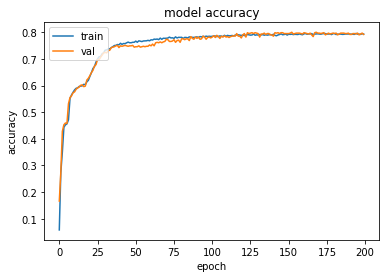

In [ ]:
plt.plot(hist1['accuracy'])
plt.plot(hist1['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Evaluate and predict on the test set

In [ ]:
model1_test_predict = model1.evaluate(xs_test, ys_test) # loss: 0.0294 - accuracy: 0.7814

32/32 [==============================] - 0s 2ms/step - loss: 0.0294 - accuracy: 0.7814


In [ ]:
test_prediction1 = model1.predict(xs_test)
print("shape is {}".format(test_prediction1.shape))  
test_prediction1

32/32 [==============================] - 0s 5ms/step
shape is (1011, 11)


array([[ 0.02057407, -0.02243582, -0.00993639, ...,  0.00242187,
        -0.0081052 ,  0.0743449 ],
       [-0.00160372,  0.17831814,  0.01505822, ..., -0.00158215,
         0.02182921,  0.00707961],
       [ 0.00919224,  0.9823342 , -0.02032506, ..., -0.01007174,
        -0.00344461, -0.00713788],
       ...,
       [ 0.03340585, -0.03527458, -0.02518821, ...,  0.73393595,
         0.01070467, -0.12341405],
       [ 0.00919224,  0.9823342 , -0.02032506, ..., -0.01007174,
        -0.00344461, -0.00713788],
       [ 0.01136497,  0.9531002 , -0.01023149, ..., -0.00946194,
        -0.0015519 , -0.00281576]], dtype=float32)

In [ ]:
color_class1 = model1.predict(xs_test)

print(color_class1[8])
print(ys_test[8]) # color 2 ie blue

32/32 [==============================] - 0s 2ms/step
[ 7.26724416e-03  7.08292425e-01 -2.24065781e-03 -1.47639215e-02
  2.21948065e-02 -2.51044333e-03  2.34603137e-02  2.70182967e-01
 -6.97217882e-03  5.83583489e-03  3.10875475e-04]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


#### Model 2

Define and compile the model

In [ ]:
# Parameters model 2
activation_fct = 'relu'
loss_function = 'mean_squared_error'
optimizer = 'adam'

# model 2
model2 = keras.Sequential([
    layers.Dense(3, kernel_regularizer=regularizers.l2(0.001), activation=activation_fct, input_shape=[3]),
    layers.Dense(24, kernel_regularizer=regularizers.l2(0.001), activation=activation_fct),
    layers.Dense(24, kernel_regularizer=regularizers.l2(0.001), activation=activation_fct),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation=activation_fct),
    layers.Dense(11)
  ])
model2.summary()

# compile the model 2
model2.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 3)                 12        
                                                                 
 dense_9 (Dense)             (None, 24)                96        
                                                                 
 dense_10 (Dense)            (None, 24)                600       
                                                                 
 dense_11 (Dense)            (None, 16)                400       
                                                                 
 dense_12 (Dense)            (None, 11)                187       
                                                                 
Total params: 1,295
Trainable params: 1,295
Non-trainable params: 0
_________________________________________________________________


Train the model 2

In [ ]:
training_history2 = model2.fit(x=xs_train, y=ys_train, 
                               validation_split=0.15, epochs=200, 
                               batch_size=100, verbose=1,
                               #callbacks=[tfdocs.modeling.EpochDots()], 
                               shuffle=True)

Epoch 1/200
35/35 [==============================] - 1s 9ms/step - loss: 0.1295 - accuracy: 0.2181 - val_loss: 0.1181 - val_accuracy: 0.3130
Epoch 2/200
35/35 [==============================] - 0s 4ms/step - loss: 0.1107 - accuracy: 0.3896 - val_loss: 0.1031 - val_accuracy: 0.4432
Epoch 3/200
35/35 [==============================] - 0s 4ms/step - loss: 0.0986 - accuracy: 0.4473 - val_loss: 0.0940 - val_accuracy: 0.4662
Epoch 4/200
35/35 [==============================] - 0s 4ms/step - loss: 0.0904 - accuracy: 0.4840 - val_loss: 0.0865 - val_accuracy: 0.5206
Epoch 5/200
35/35 [==============================] - 0s 3ms/step - loss: 0.0832 - accuracy: 0.5285 - val_loss: 0.0797 - val_accuracy: 0.5519
Epoch 6/200
35/35 [==============================] - 0s 3ms/step - loss: 0.0769 - accuracy: 0.5568 - val_loss: 0.0739 - val_accuracy: 0.5667
Epoch 7/200
35/35 [==============================] - 0s 4ms/step - loss: 0.0719 - accuracy: 0.5632 - val_loss: 0.0698 - val_accuracy: 0.5651
Epoch 8/200
3

In [ ]:
hist2 = pd.DataFrame(training_history2.history)
hist2['epoch'] = training_history2.epoch
hist2.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
195,0.042169,0.746069,0.042625,0.736409,195
196,0.042071,0.755096,0.042624,0.733114,196
197,0.042016,0.752184,0.042708,0.731466,197
198,0.042040,0.751602,0.042987,0.734761,198
199,0.042052,0.756552,0.042558,0.747941,199


In [ ]:
# Accuracy on training sets
accuracy_m2_train = model2.evaluate(xs_train, ys_train) # loss: 0.0420 - accuracy: 0.7585

print('Accuracy on train set', accuracy_m2_train)

127/127 [==============================] - 1s 4ms/step - loss: 0.0420 - accuracy: 0.7585
Accuracy on train set [0.041975684463977814, 0.7584756016731262]


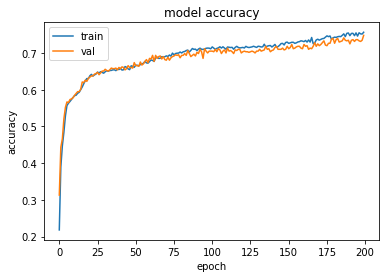

In [ ]:
plt.plot(hist2['accuracy'])
plt.plot(hist2['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Predict on the test set

In [ ]:
model2_test_predict = model2.evaluate(xs_test, ys_test) #  loss: 0.0430 - accuracy: 0.7349

32/32 [==============================] - 0s 5ms/step - loss: 0.0430 - accuracy: 0.7349


In [ ]:
test_prediction2 = model2.predict(xs_test)
print("shape is {}".format(test_prediction2.shape))  
test_prediction2

32/32 [==============================] - 0s 5ms/step
shape is (1011, 11)


array([[ 3.7407439e-02,  7.0441246e-02,  8.3180793e-02, ...,
        -8.8096932e-03,  2.8924532e-03,  9.4470963e-02],
       [-1.0180190e-02,  2.6348561e-01,  4.9384326e-02, ...,
        -7.1382277e-02,  2.1307919e-02,  2.3357462e-02],
       [ 8.7958761e-03,  1.0351453e+00, -1.7823622e-02, ...,
        -5.2443221e-03, -1.3428962e-02,  1.8202307e-02],
       ...,
       [ 1.5643463e-03, -3.0169487e-03,  2.1185130e-02, ...,
         3.3772758e-01, -1.0678468e-02, -2.2533394e-02],
       [ 2.3486149e-02,  9.6376634e-01, -1.0723412e-02, ...,
        -5.8161467e-04, -4.6227667e-03, -1.5203864e-02],
       [-7.5056776e-03,  8.1603539e-01, -3.1545267e-02, ...,
        -3.9638780e-02, -4.9927738e-03,  5.5028219e-04]], dtype=float32)

#### Model 3

Define and compile the model

In [ ]:
# Parameters model 3
activation_fct = 'relu'
loss_function = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = keras.optimizers.Adam(learning_rate=0.001)

# model 3
model3 = keras.Sequential([
    layers.Dense(3, kernel_regularizer=regularizers.l2(0.001), activation=activation_fct, input_shape=(3,)),
    layers.Dense(24, kernel_regularizer=regularizers.l2(0.001), activation=activation_fct),
    layers.Dense(24, kernel_regularizer=regularizers.l2(0.001), activation=activation_fct),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation=activation_fct),
    layers.Dense(11)
  ])
model3.summary()

# compile the model 3
model3.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 3)                 12        
                                                                 
 dense_14 (Dense)            (None, 24)                96        
                                                                 
 dense_15 (Dense)            (None, 24)                600       
                                                                 
 dense_16 (Dense)            (None, 16)                400       
                                                                 
 dense_17 (Dense)            (None, 11)                187       
                                                                 
Total params: 1,295
Trainable params: 1,295
Non-trainable params: 0
_________________________________________________________________


In [ ]:
training_history3 = model3.fit(x=xs_train, y=ys_train, 
                               validation_split=0.15, epochs=200, 
                               batch_size=200, verbose=1,
                               shuffle=True)

Epoch 1/200
18/18 [==============================] - 2s 25ms/step - loss: 2.4321 - accuracy: 0.1561 - val_loss: 2.4030 - val_accuracy: 0.3987
Epoch 2/200
18/18 [==============================] - 0s 7ms/step - loss: 2.3758 - accuracy: 0.4193 - val_loss: 2.3434 - val_accuracy: 0.4695
Epoch 3/200
18/18 [==============================] - 0s 8ms/step - loss: 2.3016 - accuracy: 0.4359 - val_loss: 2.2510 - val_accuracy: 0.4432
Epoch 4/200
18/18 [==============================] - 0s 7ms/step - loss: 2.1931 - accuracy: 0.4263 - val_loss: 2.1288 - val_accuracy: 0.4300
Epoch 5/200
18/18 [==============================] - 0s 8ms/step - loss: 2.0695 - accuracy: 0.4158 - val_loss: 2.0198 - val_accuracy: 0.4448
Epoch 6/200
18/18 [==============================] - 0s 7ms/step - loss: 1.9732 - accuracy: 0.4426 - val_loss: 1.9361 - val_accuracy: 0.4712
Epoch 7/200
18/18 [==============================] - 0s 8ms/step - loss: 1.8926 - accuracy: 0.4520 - val_loss: 1.8487 - val_accuracy: 0.4745
Epoch 8/200


In [ ]:
hist3 = pd.DataFrame(training_history3.history)
hist3.tail()

,loss,accuracy,val_loss,val_accuracy
195,0.515612,0.813337,0.546642,0.817133
196,0.518033,0.810425,0.548296,0.803954
197,0.515550,0.809843,0.543769,0.797364
198,0.514293,0.811299,0.547723,0.815486
199,0.514053,0.814793,0.543077,0.802306


In [ ]:
# Accuracy on training sets
accuracy_m3_train = model3.evaluate(xs_train, ys_train) # loss: 0.5169 - accuracy: 0.8095

print('Accuracy on train set', accuracy_m3_train)

127/127 [==============================] - 0s 2ms/step - loss: 0.5169 - accuracy: 0.8095
Accuracy on train set [0.5168761014938354, 0.8094531297683716]


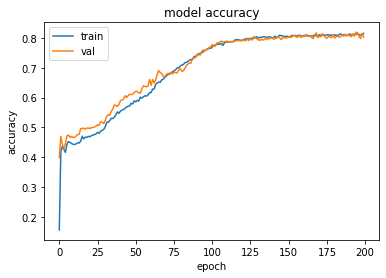

In [ ]:
# Accuracy
plt.plot(hist3['accuracy'])
plt.plot(hist3['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

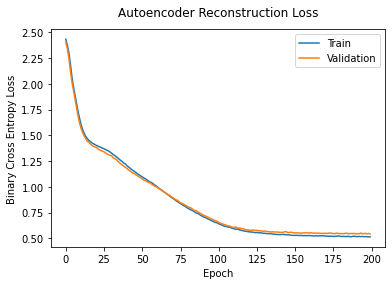

In [ ]:
# Loss function
plt.plot(training_history3.history['loss'], label='Train')
plt.plot(training_history3.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

Evaluate and predict on the test set

In [ ]:
model3_test_predict = model3.evaluate(xs_test, ys_test) # loss: 0.4480 - accuracy: 0.8546

32/32 [==============================] - 0s 2ms/step - loss: 0.5473 - accuracy: 0.7883


In [ ]:
test_prediction3 = model3.predict(xs_test)
print("shape is {}".format(test_prediction3.shape))  
test_prediction3

32/32 [==============================] - 0s 1ms/step
shape is (1011, 11)


array([[ 1.7889677e+00, -2.1795106e+00,  7.3121995e-01, ...,
        -1.1424738e+01, -2.5538763e-01,  2.5868812e+00],
       [ 1.3213478e-02,  5.5304232e+00, -3.7728369e+00, ...,
        -5.3099303e+00, -3.3383784e+00, -1.5124506e+01],
       [ 1.1620877e+00,  1.3095392e+01, -7.9762850e+00, ...,
        -1.3876769e+01, -9.6164742e+00, -1.4668030e+01],
       ...,
       [-1.9240009e+01, -8.8860006e+00,  3.2941477e+00, ...,
         8.4116421e+00, -3.6034243e+00, -8.6635208e+00],
       [ 1.6758825e+00,  8.7903490e+00, -5.5234680e+00, ...,
        -1.2905392e+01, -6.7560997e+00, -1.0448948e+01],
       [-1.1527426e-01,  1.0536202e+01, -6.9154835e+00, ...,
        -8.6046371e+00, -7.1485176e+00, -1.6468363e+01]], dtype=float32)

#### Model 4


Define and compile the model

In [ ]:
# Parameters model 4
activation_fct = 'relu'
loss_function = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = keras.optimizers.Adam(learning_rate=0.001)

# model 4
model4 = keras.Sequential([
    layers.Dense(3, kernel_regularizer=regularizers.l2(0.001), activation=activation_fct, input_shape=(3,)),
    layers.Dense(30, kernel_regularizer=regularizers.l2(0.001), activation=activation_fct),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation=activation_fct),
    layers.Dense(11)
  ])
model4.summary()

# compile the model 
model4.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 30)                120       
                                                                 
 dense_2 (Dense)             (None, 16)                496       
                                                                 
 dense_3 (Dense)             (None, 11)                187       
                                                                 
Total params: 815
Trainable params: 815
Non-trainable params: 0
_________________________________________________________________


In [ ]:
training_history4 = model4.fit(x=xs_train, y=ys_train, 
                               validation_split=0.15, epochs=200, 
                               batch_size=200, verbose=1,
                               shuffle=True)

Epoch 1/200
18/18 [==============================] - 6s 82ms/step - loss: 2.4045 - accuracy: 0.2746 - val_loss: 2.3801 - val_accuracy: 0.3740
Epoch 2/200
18/18 [==============================] - 0s 13ms/step - loss: 2.3560 - accuracy: 0.4278 - val_loss: 2.3263 - val_accuracy: 0.5157
Epoch 3/200
18/18 [==============================] - 0s 16ms/step - loss: 2.2882 - accuracy: 0.4819 - val_loss: 2.2460 - val_accuracy: 0.4794
Epoch 4/200
18/18 [==============================] - 0s 10ms/step - loss: 2.1910 - accuracy: 0.4479 - val_loss: 2.1317 - val_accuracy: 0.4712
Epoch 5/200
18/18 [==============================] - 0s 15ms/step - loss: 2.0578 - accuracy: 0.4549 - val_loss: 1.9907 - val_accuracy: 0.4745
Epoch 6/200
18/18 [==============================] - 0s 13ms/step - loss: 1.9106 - accuracy: 0.4659 - val_loss: 1.8573 - val_accuracy: 0.5140
Epoch 7/200
18/18 [==============================] - 0s 23ms/step - loss: 1.7846 - accuracy: 0.5151 - val_loss: 1.7511 - val_accuracy: 0.5684
Epoch 

In [ ]:
hist4 = pd.DataFrame(training_history4.history)
hist4.tail()

,loss,accuracy,val_loss,val_accuracy
195,0.406273,0.875364,0.461938,0.859967
196,0.407796,0.875364,0.462165,0.861615
197,0.406252,0.875073,0.458130,0.856672
198,0.404117,0.874782,0.468967,0.856672
199,0.405315,0.877402,0.458264,0.856672


In [ ]:
# Accuracy on training sets
accuracy_m4_train = model4.evaluate(xs_train, ys_train) # loss: 0.4072 - accuracy: 0.8765

print('Accuracy on train set', accuracy_m4_train)

127/127 [==============================] - 0s 1ms/step - loss: 0.4121 - accuracy: 0.8728
Accuracy on train set [0.4120873808860779, 0.8728037476539612]


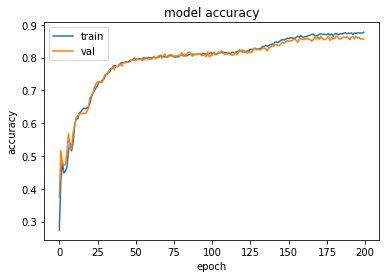

In [ ]:
plt.plot(hist4['accuracy'])
plt.plot(hist4['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model4_test_predict = model4.evaluate(xs_test, ys_test) # loss: 0.4553 - accuracy: 0.8566

32/32 [==============================] - 0s 2ms/step - loss: 0.4607 - accuracy: 0.8526


#### Model 5


Define and compile the model

In [ ]:
def create_model(activation='relu'):
  # create model
  model5 = keras.Sequential([
    layers.Dense(3, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(3,)),
    layers.Dense(24, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    layers.Dense(24, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='Softmax'),
    layers.Dense(11)
  ])
  # Compile model
  model5.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), 
                 optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
  return model5

In [ ]:


# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
activation_fct = ['softmax', 'relu']
#activation_fct = ['tanh', 'hard_sigmoid', 'linear', 'sigmoid']
param_grid = dict(optimizer__learning_rate=learn_rate, optimizer__momentum=momentum, model__activation=activation_fct)

# other parameters
loss_function = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = keras.optimizers.Adam(learning_rate=0.001)

# model 5
# create model
model5 = KerasClassifier(model=create_model, epochs=150, batch_size=200, verbose=0)

grid_result5 = GridSearchCV(estimator=model5, param_grid=param_grid, n_jobs=-1, cv=5)

grid_result5.fit(xs_train, ys_train)


/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=KerasClassifier(batch_size=200, epochs=150, model=<function create_model at 0x7f6f02a5ab80>, verbose=0),
             n_jobs=-1,
             param_grid={'model__activation': ['softmax', 'relu'],
                         'optimizer__learning_rate': [0.001, 0.01, 0.1, 0.2,
                                                      0.3],
                         'optimizer__momentum': [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]})

In [ ]:
# print best parameter after tuning
print(grid_result5.best_params_)
best_param5 = grid_result5.best_params_
  
# print how our model looks after hyper-parameter tuning
print(grid_result5.best_estimator_)

In [ ]:
# Accuracy
accuracy_model5_train = grid_result5.score(xs_train, ys_train)
model5_test_predict = grid_result5.score(xs_test, ys_test)

print('Accuracy of model (train)', accuracy_model5_train)
print('Accuracy of model (test)', model5_test_predict) 

#### Model 6

Based on the model 3 parameters, this section will be used to adjust the learning rate

In [ ]:
# Parameters model 6
activation_fct = 'relu'
loss_function = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = keras.optimizers.Adam(learning_rate=0.0005)

# model 6
model6 = keras.Sequential([
    layers.Dense(3, kernel_regularizer=regularizers.l2(0.001), activation=activation_fct, input_shape=(3,)),
    layers.Dense(24, kernel_regularizer=regularizers.l2(0.001), activation=activation_fct),
    layers.Dense(24, kernel_regularizer=regularizers.l2(0.001), activation=activation_fct),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation=activation_fct),
    layers.Dense(11)
  ])
model6.summary()

# compile the model 6
model6.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 3)                 12        
                                                                 
 dense_23 (Dense)            (None, 24)                96        
                                                                 
 dense_24 (Dense)            (None, 24)                600       
                                                                 
 dense_25 (Dense)            (None, 16)                400       
                                                                 
 dense_26 (Dense)            (None, 11)                187       
                                                                 
Total params: 1,295
Trainable params: 1,295
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit on training set
training_history6 = model6.fit(x=xs_train, y=ys_train, 
                               validation_split=0.15, epochs=275, 
                               batch_size=300, verbose=0,
                               shuffle=True)


In [ ]:
# Accuracy on training sets
accuracy_m6_train = model6.evaluate(xs_train, ys_train) # loss: 0.5171 - accuracy: 0.8288

print('Accuracy on train set', accuracy_m6_train)

127/127 [==============================] - 0s 2ms/step - loss: 0.5171 - accuracy: 0.8288
Accuracy on train set [0.5170865058898926, 0.828755259513855]


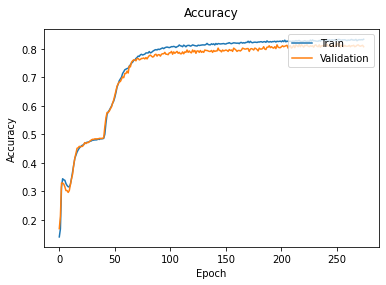

In [ ]:
# Accuracy
plt.plot(training_history6.history['accuracy'], label='Train')
plt.plot(training_history6.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Accuracy', pad=13)
plt.legend(loc='upper right')

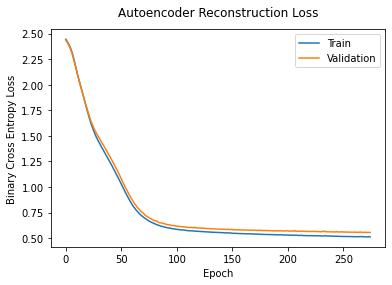

In [ ]:
plt.plot(training_history6.history['loss'], label='Train')
plt.plot(training_history6.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

In [ ]:
model6_test_predict = model6.evaluate(xs_test, ys_test) # loss: 0.5570 - accuracy: 0.8121

32/32 [==============================] - 0s 2ms/step - loss: 0.5570 - accuracy: 0.8121


#### Model 7

In [ ]:
# Parameters model 7
activation_fct = 'relu'
loss_function = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = keras.optimizers.Adam(learning_rate=0.0005)

# model 7
model7 = keras.Sequential([
    layers.Dense(3, kernel_regularizer=regularizers.l2(0.001), activation=activation_fct, input_shape=(3,)),
    layers.Dense(24, kernel_regularizer=regularizers.l2(0.001), activation=activation_fct),
    layers.Dense(24, kernel_regularizer=regularizers.l2(0.001), activation=activation_fct),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation=activation_fct),
    layers.Dense(11)
  ])
model7.summary()

# compile the model 6
model7.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 3)                 12        
                                                                 
 dense_28 (Dense)            (None, 24)                96        
                                                                 
 dense_29 (Dense)            (None, 24)                600       
                                                                 
 dense_30 (Dense)            (None, 16)                400       
                                                                 
 dense_31 (Dense)            (None, 11)                187       
                                                                 
Total params: 1,295
Trainable params: 1,295
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit on training set
training_history7 = model7.fit(x=xs_train, y=ys_train, 
                               validation_split=0.15, epochs=300, 
                               batch_size=315, verbose=0,
                               shuffle=True)


In [ ]:
# Accuracy on training sets
accuracy_m7_train = model7.evaluate(xs_train, ys_train) # loss: loss: 0.5633 - accuracy: 0.8052
print('Accuracy on train set', accuracy_m7_train)

127/127 [==============================] - 0s 2ms/step - loss: 0.5633 - accuracy: 0.8052
Accuracy on train set [0.5633021593093872, 0.8052462339401245]


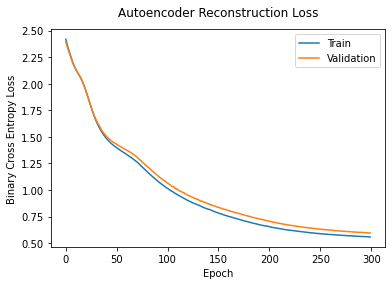

In [ ]:
plt.plot(training_history7.history['loss'], label='Train')
plt.plot(training_history7.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

In [ ]:
model7_test_predict = model7.evaluate(xs_test, ys_test) # loss: 0.5914 - accuracy: 0.7943

32/32 [==============================] - 0s 5ms/step - loss: 0.5914 - accuracy: 0.7943


## Compare Accuray of all the models

In [ ]:
df_accuracy = pd.DataFrame([model1_test_predict, model2_test_predict, model3_test_predict, model4_test_predict, [0, model5_test_predict], model6_test_predict, model7_test_predict])

In [ ]:
df_accuracy = df_accuracy.rename({0: 'loss', 1: 'accuracy'}, axis=1)
df_accuracy["model"] = ["model1", "model2", "model3", "model4", "model5", "model6", "model7"]

In [ ]:
df_accuracy.sort_values('accuracy') #  => best model is model 4

,loss,accuracy,model
1,0.043014,0.734916,model2
0,0.029364,0.781405,model1
2,0.547259,0.788328,model3
5,0.591377,0.794263,model7
4,0.556953,0.812067,model6
3,0.455313,0.856578,model4


#### Evaluate performances

In [ ]:
model4_predictions = model4.predict(xs_test)
model4_predictions = np.argmax(model4_predictions, axis=1)
model4_predictions 

32/32 [==============================] - 0s 6ms/step


array([3, 7, 1, ..., 8, 1, 1])

In [ ]:
#model4_predictions = np.array(pd.get_dummies(pd.Series(model4_predictions)))

In [ ]:
ys_test_list = np.argmax(ys_test, axis=1)

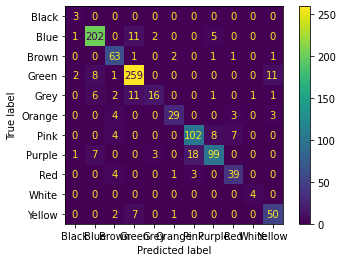

              precision    recall  f1-score   support

       Black       0.43      1.00      0.60         3
        Blue       0.91      0.91      0.91       221
       Brown       0.79      0.91      0.85        69
       Green       0.90      0.92      0.91       281
        Grey       0.76      0.42      0.54        38
      Orange       0.88      0.74      0.81        39
        Pink       0.83      0.84      0.84       121
      Purple       0.87      0.77      0.82       128
         Red       0.78      0.83      0.80        47
       White       0.80      1.00      0.89         4
      Yellow       0.76      0.83      0.79        60

    accuracy                           0.86      1011
   macro avg       0.79      0.84      0.80      1011
weighted avg       0.86      0.86      0.85      1011



In [ ]:
target_names = ['Black', 'Blue', 'Brown', 'Green', 'Grey', 'Orange', 'Pink', 'Purple', 'Red', 'White', 'Yellow']

# Confusion matrix
confusion_mat = confusion_matrix(ys_test_list, model4_predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = target_names)
cm_display.plot()
plt.show()

# model performance report
print(classification_report(ys_test_list, model4_predictions, target_names=target_names))

## Towards Arduino

ref: https://colab.research.google.com/github/arduino/ArduinoTensorFlowLiteTutorials/blob/master/GestureToEmoji/arduino_tinyml_workshop.ipynb#scrollTo=0Xn1-Rn9Cp_8

https://colab.research.google.com/github/ucl-casa-ce/casa0018/blob/main/Week4/CASA0018_4_1_train_hello_world_model.ipynb#scrollTo=1muAoUm8lSXL

### Convert the Trained Model n° 4 to Tensor Flow Lite
In the below cell, we convert the model *4* format into TFlite format

In [ ]:
import os

MODELS_DIR = 'models/'
if not os.path.exists(MODELS_DIR):
    os.mkdir(MODELS_DIR)
MODEL_TF = MODELS_DIR + 'model'
MODEL_NO_QUANT_TFLITE = MODELS_DIR + 'model_no_quant.tflite'
MODEL_TFLITE = MODELS_DIR + 'model.tflite'
MODEL_TFLITE_MICRO = MODELS_DIR + 'model.cc'

In [ ]:
# Save the model to disk
model4.save(MODEL_TF)

# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_TF)
model_no_quant_tflite = converter.convert()

# Save the model to disk
open(MODEL_NO_QUANT_TFLITE, "wb").write(model_no_quant_tflite)

# Convert the model to the TensorFlow Lite format with quantization
def representative_dataset_generator():
  for value in xs_train:
    yield [np.array(value, dtype=np.float32, ndmin=2)]

# Set the optimization flag - DEFAULT includes quantization.
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Enforce integer only quantization to reduce model size
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8

# Provide a representative dataset to ensure we quantize correctly.
converter.representative_dataset = representative_dataset_generator

model_tflite = converter.convert()

# Save the model to disk
open(MODEL_TFLITE, "wb").write(model_tflite)

NameError: ignored

In [ ]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model4)
tflite_model = converter.convert()

# Save the model to disk
open("colourdetec_model.tflite", "wb").write(tflite_model)
  

basic_model_size = os.path.getsize("colourdetec_model.tflite")
print("Model is %d bytes" % basic_model_size)
  

Model is 5544 bytes


### Convert the Trained Model n° 4 to be used in Arduino

In [ ]:
!echo "const unsigned char model[] = {" > /content/model_colour.h
!cat colourdetec_model.tflite | xxd -i      >> /content/model_colour.h
!echo "};"                              >> /content/model_colour.h

import os
model_h_size = os.path.getsize("model_colour.h")
print(f"Header file, model_colour.h, is {model_h_size:,} bytes.")

Header file, model_colour.h, is 34,222 bytes.


#### Compare performance after conversion


In [ ]:
def predict_tflite(tflite_model, x_test):
  # Prepare the test data
  x_test_ = x_test.copy()
  #x_test_ = x_test_.reshape((x_test.size, 1))
  x_test_ = x_test_.astype(np.float32)

  # Initialize the TFLite interpreter
  interpreter = tf.lite.Interpreter(model_content=tflite_model)
  interpreter.allocate_tensors()

  input_details = interpreter.get_input_details()[0]
  output_details = interpreter.get_output_details()[0]

  # If required, quantize the input layer (from float to integer)
  input_scale, input_zero_point = input_details["quantization"]
  if (input_scale, input_zero_point) != (0.0, 0):
    x_test_ = x_test_ / input_scale + input_zero_point
    x_test_ = x_test_.astype(input_details["dtype"])
  
  # Invoke the interpreter
  y_pred = np.empty(x_test_.size, dtype=output_details["dtype"])
  for i in range(len(x_test_)):
    interpreter.set_tensor(input_details["index"], [x_test_[i]])
    interpreter.invoke()
    y_pred[i] = np.argmax(interpreter.get_tensor(output_details["index"])[[0]])
  
  # If required, dequantized the output layer (from integer to float)
  output_scale, output_zero_point = output_details["quantization"]
  if (output_scale, output_zero_point) != (0.0, 0):
    y_pred = y_pred.astype(np.float32)
    y_pred = (y_pred - output_zero_point) * output_scale

  return y_pred

def evaluate_tflite(tflite_model, x_test, y_true):
  global model4
  y_pred = predict_tflite(tflite_model, x_test)
  loss_function = tf.keras.losses.get(model4.loss)
  loss = loss_function(y_true, y_pred).numpy()
  return loss

In [ ]:
# Calculate predictions
y_test_pred_tf = model4.predict(xs_test)
y_test_pred_no_quant_tflite = predict_tflite(model_no_quant_tflite, xs_test)
y_test_pred_tflite = predict_tflite(model_tflite, xs_test)

32/32 [==============================] - 0s 2ms/step


### Generate a TensorFlow Lite for Microcontrollers Model

In [ ]:
# Install xxd if it is not available
!apt-get update && apt-get -qq install xxd
# Convert to a C source file, i.e, a TensorFlow Lite for Microcontrollers model
!xxd -i {MODEL_TFLITE} > {MODEL_TFLITE_MICRO}

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu focal InRelease
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:5 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ Packages [74.2 kB]
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages [923 kB]
Get:9 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:10 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2,545 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:12 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1,314 kB]
Hit:13 http://ppa.launchp

In [ ]:
MODEL_TFLITE_MICRO

'models/model.cc'

In [ ]:
# Print the C source file
!cat {MODEL_TFLITE_MICRO}


unsigned char models_model_tflite[] = {
  0x20, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x00, 0x00,
  0x14, 0x00, 0x20, 0x00, 0x1c, 0x00, 0x18, 0x00, 0x14, 0x00, 0x10, 0x00,
  0x0c, 0x00, 0x00, 0x00, 0x08, 0x00, 0x04, 0x00, 0x14, 0x00, 0x00, 0x00,
  0x1c, 0x00, 0x00, 0x00, 0x90, 0x00, 0x00, 0x00, 0xe8, 0x00, 0x00, 0x00,
  0x10, 0x06, 0x00, 0x00, 0x20, 0x06, 0x00, 0x00, 0x4c, 0x0e, 0x00, 0x00,
  0x03, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x10, 0x00, 0x00, 0x00,
  0x00, 0x00, 0x0a, 0x00, 0x10, 0x00, 0x0c, 0x00, 0x08, 0x00, 0x04, 0x00,
  0x0a, 0x00, 0x00, 0x00, 0x0c, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00,
  0x38, 0x00, 0x00, 0x00, 0x0f, 0x00, 0x00, 0x00, 0x73, 0x65, 0x72, 0x76,
  0x69, 0x6e, 0x67, 0x5f, 0x64, 0x65, 0x66, 0x61, 0x75, 0x6c, 0x74, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x98, 0xff, 0xff, 0xff,
  0x0c, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x07, 0x00, 0x00, 0x00,
  0x64, 0x65, 0x6e, 0x73, 0x65, 0x5f, 0x33, 0x00, 0x01, 0x00, 0x00, 0x00